<a href="https://colab.research.google.com/github/bushht/Assignments/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bushra Hoteit**

Github link: https://github.com/bushht/Assignments/blob/main/Final_Project.ipynb

1. **Problem Definition and Dataset Selection**

Diabetes is a chronic disease that, if left undiagnosed or untreated, can lead to severe health complications such as heart disease, kidney failure, and vision loss. Early detection is crucial to managing and preventing the progression of the disease. The goal of this AI application is to build a machine learning model that can predict whether a patient is likely to develop diabetes based on medical diagnostic features. So this will be a classification problem where outcome is either 0 (no diabetes) or 1 (diabetes).

Note: all patients in the data are females at least 21 years old of Pima Indian heritage.

Data source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

**2. Data Preprocessing and Exploration**

***Load the dataset and explore it thoroughly.***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('diabetes.csv')

# First 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Descriptive statistics

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Diabetes outcome of each person in the data (1 indicates person has diabetes)

df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


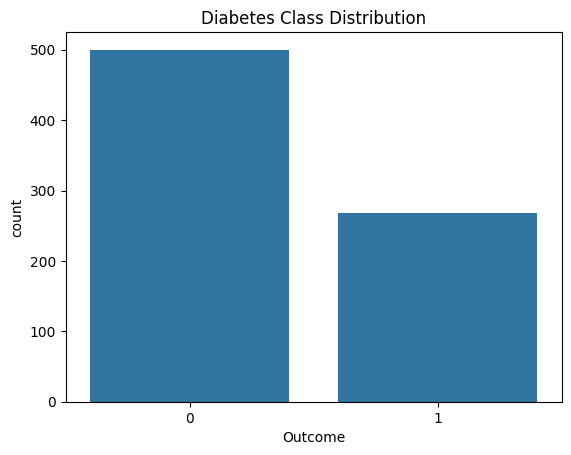

In [ ]:
# Visualize diabetes outcome distribution

sns.countplot(data=df, x='Outcome')
plt.title("Diabetes Class Distribution")
plt.show()

***Handle any missing values, outliers, and preprocess the data (e.g., normalization, encoding categorical variables).***

In [ ]:
# Checking for missing values

df.isnull().sum()

# No missing values

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# However, we have columns that have 0's but shouldn't
# Columns that shouldn't have 0s

invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count and print the number of zero values in each column
for col in invalid_cols:
    print(f"{col}: {(df[col] == 0).sum()} zeros")


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


In [ ]:
# Replace 0s with NaN
df[invalid_cols] = df[invalid_cols].replace(0, np.nan)

# Show count of missing values
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
# Filling the missing values which were 0's with the median of that column

df[invalid_cols] = df[invalid_cols].fillna(df[invalid_cols].median())


In [ ]:
# Normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('Outcome', axis=1)
X_scaled = scaler.fit_transform(X)

# Recreate DataFrame with the scaled data
X = pd.DataFrame(X_scaled, columns=X.columns)
y = df['Outcome']


***Visualize relationships in the data using charts and graphs to better understand the patterns.***

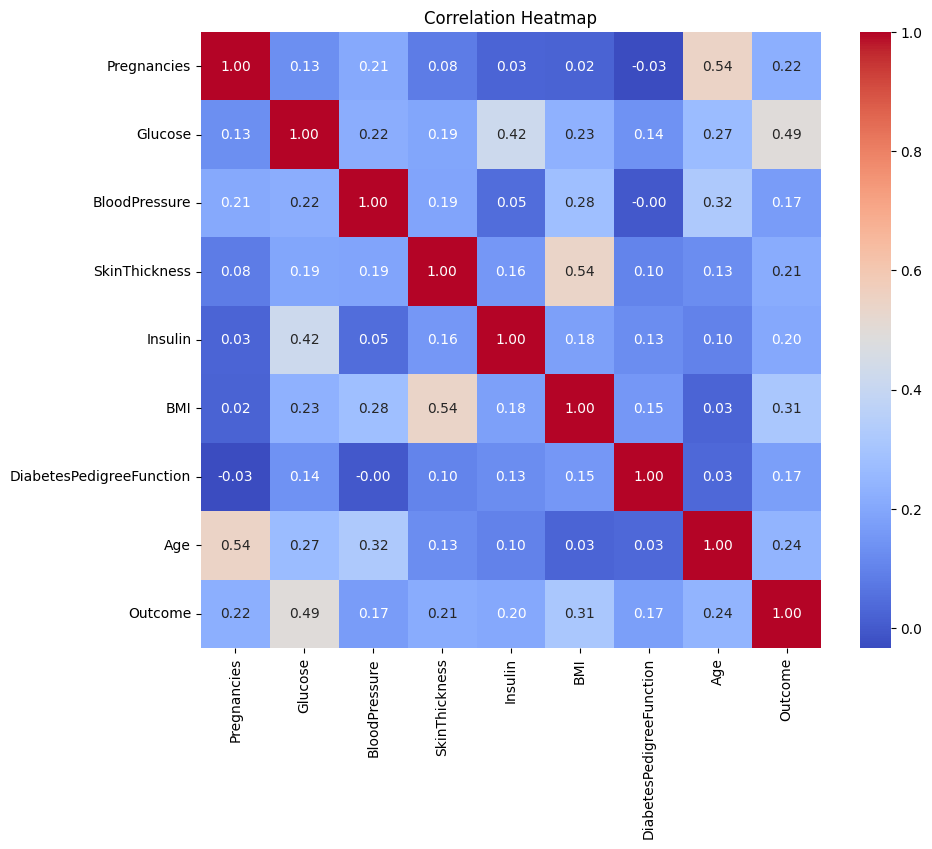

In [ ]:
# Relationship between features using correlation heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Correlation between Glucose & Outcome = 0.49 -> moderately positive correlation -> as glucose increases, the chance of diabetes increases.
# Correlation between BMI & Outcome = 0.31 -> weaker positive correlation -> higher BMI is associated with slightly more diabetes cases.
# Correlation between Age & Outcome = 0.23 -> older people slightly more likely to be diabetic.

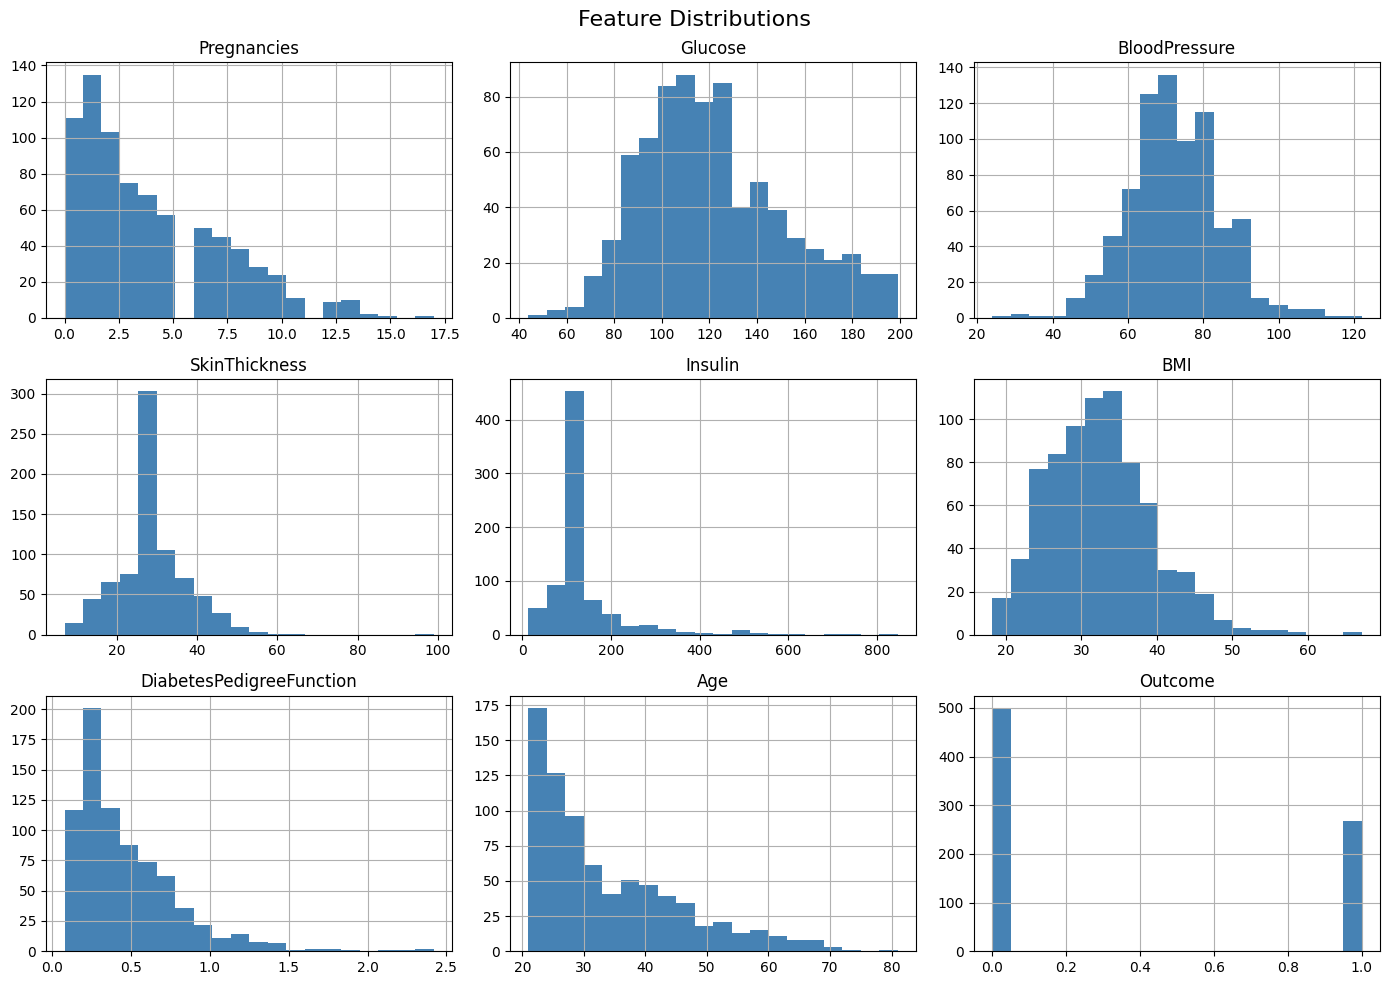

In [ ]:
# Histogram for feature distribution

df.hist(bins=20, figsize=(14, 10), color='steelblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Most feature distributions are right skewed except for Glucose & Blood Pressure which had a normal distribution
# Majority of the data points are concentrated on the lower levels, with a few higher values stretching the tail to the right.

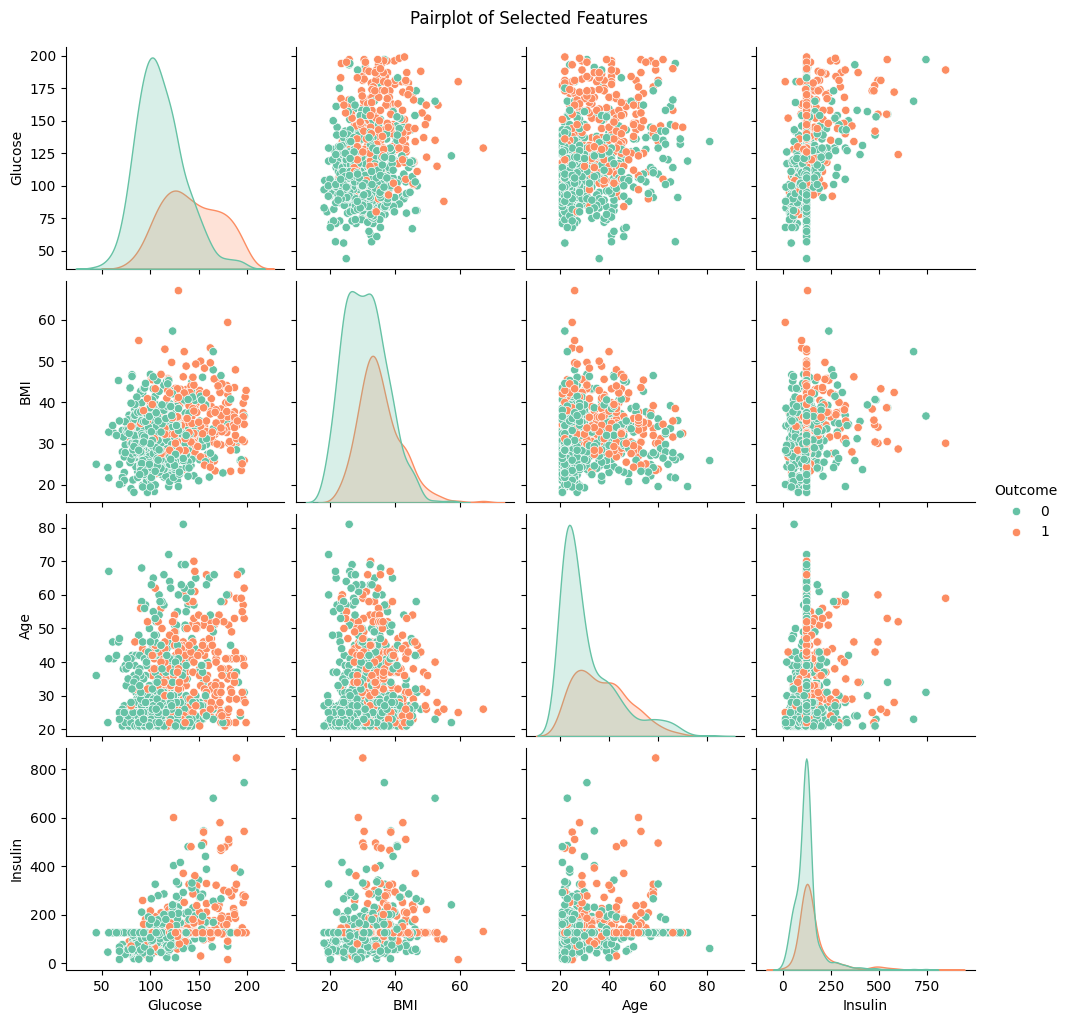

In [ ]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', palette='Set2')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

# This shows us how a pair of different diagnostic measurement values differ for diabetics & non diabetics.
# For example, when the glucose levels were higher, the outcome was more likely a diabetics person (1)

/tmp/ipython-input-14-925869315.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=df, palette='Set1')


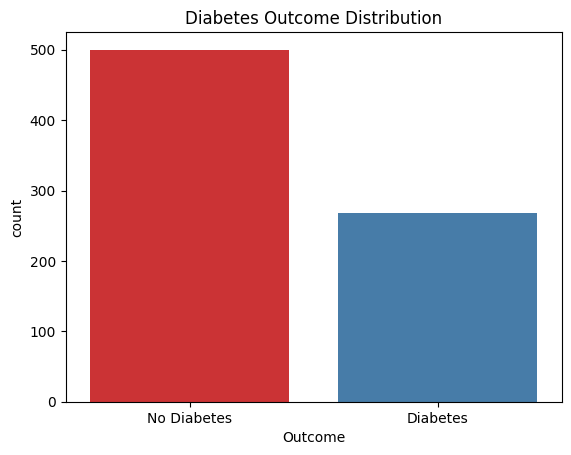

In [ ]:
# Countplot of outcome

sns.countplot(x='Outcome', data=df, palette='Set1')
plt.title("Diabetes Outcome Distribution")
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()


***Split the data into training and testing sets for model evaluation.***

In [ ]:
from sklearn.model_selection import train_test_split

# Specifiying features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (614, 8)
Testing set shape: (154, 8)


**3. Model Selection and Development**

***Based on the type of problem (classification, regression, etc.), select an appropriate model (e.g., decision trees, random forests, support vector machines, etc.).***

***Train your selected model using the training data.***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Trying out different models to check their accuracy

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # SVM has the highest accuracy at 0.72 so i will continue with it


Logistic Regression
Accuracy: 0.7013
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

Confusion Matrix:
 [[81 19]
 [27 27]]

Decision Tree
Accuracy: 0.6883
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       100
           1       0.57      0.48      0.52        54

    accuracy                           0.69       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.68      0.69      0.68       154

Confusion Matrix:
 [[80 20]
 [28 26]]

Random Forest
Accuracy: 0.7143
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.80      0.

***Ensure your model is well-optimized and perform hyperparameter tuning to improve its performance.***

***Use cross-validation where applicable to evaluate the model's robustness.***

In [ ]:
svm = SVC(probability=True, random_state=42)

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}


In [ ]:
# Grid Search with 5-fold cross-validation
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit grid search
grid_svm.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best SVM Parameters:", grid_svm.best_params_)
print("Best Cross-Validation Accuracy:", round(grid_svm.best_score_, 4))


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.777


**4. Model Evaluation and Optimization**

***Evaluate your model using the test set and appropriate performance metrics (e.g., accuracy, precision, recall, RMSE, AUC, etc.).***

In [ ]:
# Evaluate on test set
svm_best = grid_svm.best_estimator_
svm_pred = svm_best.predict(X_test)

print("Test Accuracy:", round(accuracy_score(y_test, svm_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, svm_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, svm_pred))

# SVM model based on best estimator is 73%, meaning it correctly predicted 73% of the cases.
# We can also see a minor improvement in accuracy after performing hyperparameter & using cross vlaidation  (from 0.72 to 0.73)

# Class 0 (Non-Diabetics):
    # High recall (0.88): Most non-diabetics are correctly identified.
    # Precision (0.75): Of predicted non-diabetics, 75% are correct.

# Class 1 (Diabetics):
    # Lower recall (0.46): Model misses over half of diabetics.
    # Precision (0.68): When predicting diabetics, it is correct 68% of the time.

# The model is better at identifying non-diabetics than diabetics


Test Accuracy: 0.7338

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       100
           1       0.68      0.46      0.55        54

    accuracy                           0.73       154
   macro avg       0.71      0.67      0.68       154
weighted avg       0.73      0.73      0.72       154


Confusion Matrix:
 [[88 12]
 [29 25]]


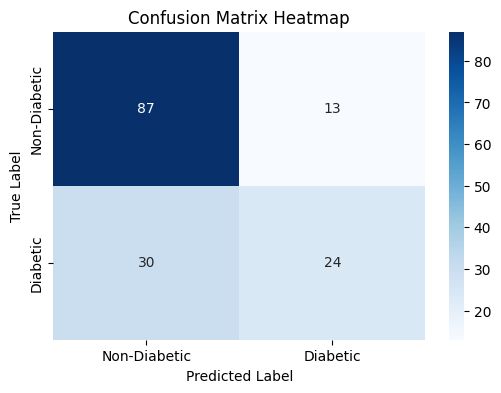

In [ ]:
# Plot as heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Low number of true positives for Diabetic

***Tune your model for optimal performance using techniques like grid search, random search, and feature selection.***

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Grid search already done in previous question

param_dist = {
    'C': uniform(0.1, 10),
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

# Using random search
random_search = RandomizedSearchCV(SVC(probability=True), param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", round(random_search.best_score_, 4))


# Accuracy slightly improved using random research to 0.7786 (was 0.73 using grid search)

Best Parameters: {'C': np.float64(6.942330265121568), 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.7786


In [ ]:
# Feature selection (helps the model focus on relevant features, improving generalization and reducing overfitting)

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Retrain model on selected features
svm.fit(X_train_selected, y_train)
print("Accuracy with selected features:", round(svm.score(X_test_selected, y_test),4))

# Accuracy actually decreased to 0.71 with feature selection, probably becuase this dataset has a small feature set.

Accuracy with selected features: 0.7078


***If applicable, implement techniques such as regularization (L1/L2) or dropout to improve model generalization.***

**5. Model Deployment and Presentation**

***Create a clear, user-friendly interface where users can input data and see model predictions.***

In [ ]:
# Input from users
input_data = [[2, 200, 70, 25, 100, 28.5, 0.45, 30]]

feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


input_df = pd.DataFrame(input_data, columns=feature_names)
prediction = svm_best.predict(input_df)

if prediction[0] == 0:
    print("Prediction: Non-Diabetic")
else:
    print("Prediction: Diabetic")


Prediction: Diabetic


***Present your findings and results in a clear and engaging way. Include visualizations of your model's performance and any insights you gathered from the data.***

Key findings from EDA: Higher glucose, BMI and age are associated with higher diabetes risk.

The model can effectively assist in initial diabetes risk screening, highlighting high-risk individuals for further medical evaluation.

The SVM moodel performance improved from 0.72 to 0.78 using Random Search. This means 78% of the predictions are correct which is an acceptable number but could be improved.

We need to further address class imbalance for higher recall on diabetic cases.

(Visualizations presented earlier)